In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("C:/Users/AJAY SINGH/Downloads/StudentsPerformance.csv")

In [3]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
a={'male':1,'female':0}
data['gender']=data['gender'].map(a)

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le=LabelEncoder()

In [10]:
data['race/ethnicity']=le.fit_transform(data['race/ethnicity'])

In [11]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,bachelor's degree,standard,none,72,72,74
1,0,2,some college,standard,completed,69,90,88
2,0,1,master's degree,standard,none,90,95,93
3,1,0,associate's degree,free/reduced,none,47,57,44
4,1,2,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,0,4,master's degree,standard,completed,88,99,95
996,1,2,high school,free/reduced,none,62,55,55
997,0,2,high school,free/reduced,completed,59,71,65
998,0,3,some college,standard,completed,68,78,77


In [12]:
data['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [13]:
data['parental level of education']=le.fit_transform(data['parental level of education'])
data['lunch']=le.fit_transform(data['lunch'])
data['test preparation course']=le.fit_transform(data['test preparation course'])


In [14]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75
...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,88,99,95
996,1,2,2,0,1,62,55,55
997,0,2,2,0,0,59,71,65
998,0,3,4,1,0,68,78,77


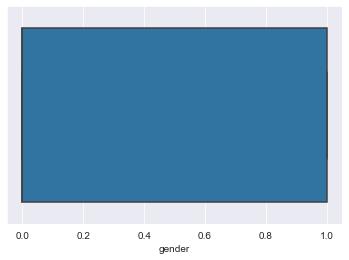

In [15]:
sns.boxplot(data['gender'])

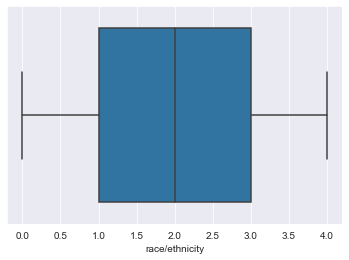

In [16]:
sns.boxplot(data['race/ethnicity'])

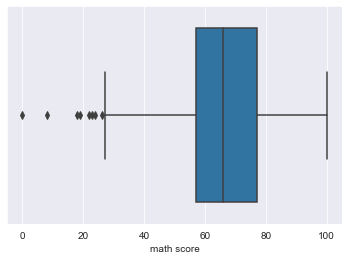

In [17]:
sns.boxplot(data['math score'])

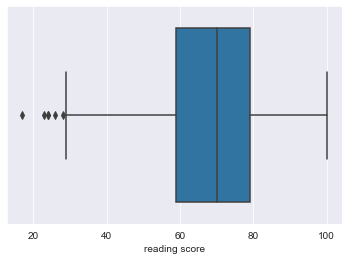

In [18]:
sns.boxplot(data['reading score'])

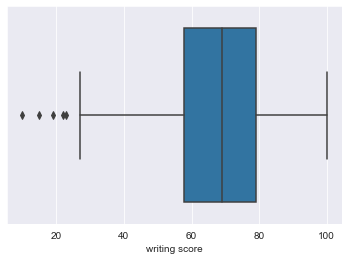

In [19]:
sns.boxplot(data['writing score'])

In [20]:
# q1=data.quantile(0.25)
# q3=data.quantile(0.75)
# IQR=q3-q1
# data=data[~((data< q1-1.5*IQR)|(data>1.5*IQR)).any(axis=1)]

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   int64
 1   race/ethnicity               1000 non-null   int32
 2   parental level of education  1000 non-null   int32
 3   lunch                        1000 non-null   int32
 4   test preparation course      1000 non-null   int32
 5   math score                   1000 non-null   int64
 6   reading score                1000 non-null   int64
 7   writing score                1000 non-null   int64
dtypes: int32(4), int64(4)
memory usage: 47.0 KB


In [22]:
data['Total_score']=data['math score']+data['reading score']+data['writing score']


In [23]:
from sklearn.preprocessing import  MinMaxScaler

In [24]:
col=['math score','reading score','writing score','Total_score']
features=data[col]
features


,math score,reading score,writing score,Total_score
0,72,72,74,218
1,69,90,88,247
2,90,95,93,278
3,47,57,44,148
4,76,78,75,229
...,...,...,...,...
995,88,99,95,282
996,62,55,55,172
997,59,71,65,195
998,68,78,77,223


In [25]:
mi=MinMaxScaler()

In [26]:
data[col]=mi.fit_transform(features)

In [27]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_score
0,0,1,1,1,1,0.72,0.662651,0.711111,0.699634
1,0,2,4,1,0,0.69,0.879518,0.866667,0.805861
2,0,1,3,1,1,0.90,0.939759,0.922222,0.919414
3,1,0,0,0,1,0.47,0.481928,0.377778,0.443223
4,1,2,4,1,1,0.76,0.734940,0.722222,0.739927
...,...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,0.88,0.987952,0.944444,0.934066
996,1,2,2,0,1,0.62,0.457831,0.500000,0.531136
997,0,2,2,0,0,0.59,0.650602,0.611111,0.615385
998,0,3,4,1,0,0.68,0.734940,0.744444,0.717949


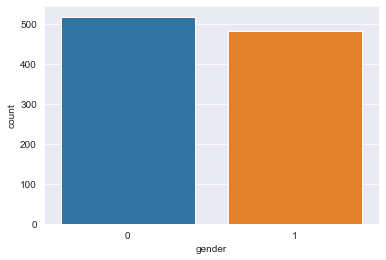

In [28]:
sns.countplot(data['gender'])

In [29]:
##Girls are more as compared to boys

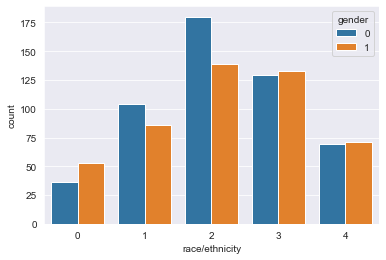

In [30]:
sns.countplot(data['race/ethnicity'],hue=data['gender'])

In [31]:
# Group 2 students are max

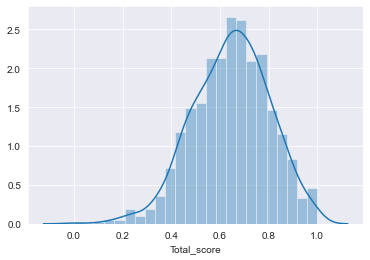

In [32]:
sns.distplot(data['Total_score'])

## Gender Prediction

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

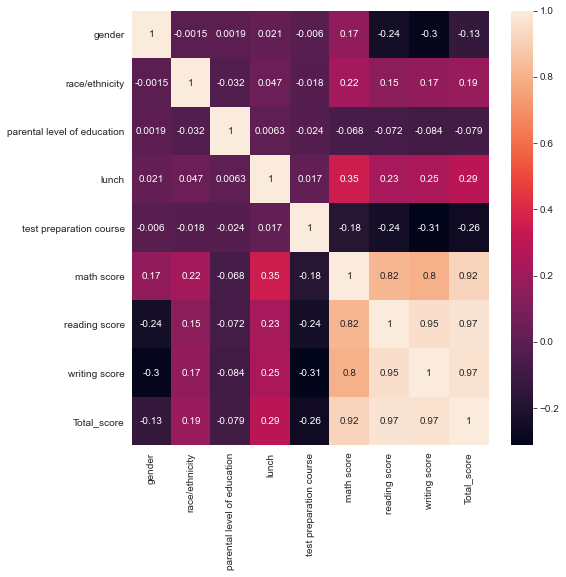

In [35]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot=True)

In [37]:
X=data[['math score','reading score','writing score','Total_score']]
y=data['gender']

In [38]:
X

,math score,reading score,writing score,Total_score
0,0.72,0.662651,0.711111,0.699634
1,0.69,0.879518,0.866667,0.805861
2,0.90,0.939759,0.922222,0.919414
3,0.47,0.481928,0.377778,0.443223
4,0.76,0.734940,0.722222,0.739927
...,...,...,...,...
995,0.88,0.987952,0.944444,0.934066
996,0.62,0.457831,0.500000,0.531136
997,0.59,0.650602,0.611111,0.615385
998,0.68,0.734940,0.744444,0.717949


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [58]:
lr=LogisticRegression()

In [59]:
model1=lr.fit(X_train,y_train)

In [60]:
y_pred1=model1.predict(X_test)

In [61]:
from sklearn.metrics import confusion_matrix ,accuracy_score

In [62]:
confusion_matrix(y_pred1,y_test)

array([[137,  18],
       [ 16, 129]], dtype=int64)

In [63]:
accuracy_score(y_pred1,y_test)

0.8866666666666667

In [64]:
de=DecisionTreeClassifier(criterion='gini')
model2=de.fit(X_train,y_train)
y_pred2=model2.predict(X_test)

In [65]:
confusion_matrix(y_pred2,y_test)

array([[121,  24],
       [ 32, 123]], dtype=int64)

In [66]:
accuracy_score(y_pred2,y_test)

0.8133333333333334

In [67]:
ra=RandomForestClassifier(criterion='entropy')
model3=ra.fit(X_train,y_train)
y_pred3=model3.predict(X_test)

In [68]:
confusion_matrix(y_pred3,y_test)

array([[135,  21],
       [ 18, 126]], dtype=int64)

In [69]:
accuracy_score(y_pred3,y_test)

0.87

In [70]:
from sklearn.neighbors import KNeighborsClassifier
ne=KNeighborsClassifier(n_neighbors=1)
model4=ne.fit(X_train,y_train)
y_pred4=model4.predict(X_test)


In [71]:
confusion_matrix(y_pred4,y_test)

array([[121,  25],
       [ 32, 122]], dtype=int64)

In [72]:
accuracy_score(y_pred4,y_test)

0.81

In [74]:
print("Accuracy Score Logistic_Regression:",round(accuracy_score(y_pred1,y_test),2))
print("Accuracy Score DecisionTreeClassifier:",round(accuracy_score(y_pred2,y_test),2))
print("Accuracy Score :RandomForestClassifier",round(accuracy_score(y_pred3,y_test),2))
print("Accuracy Score KNeighborsClassifier:",round(accuracy_score(y_pred4,y_test),2))

Accuracy Score Logistic_Regression: 0.89
Accuracy Score DecisionTreeClassifier: 0.81
Accuracy Score :RandomForestClassifier 0.87
Accuracy Score KNeighborsClassifier: 0.81
